In [98]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("./Project data/insurance.csv")  
df

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [100]:
target_col = "expenses"
df_enc = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
X = df_enc.drop(columns=[target_col]).values.astype(float)
y_raw = df_enc[target_col].values.reshape(-1,1).astype(float)

In [101]:
# Train-test split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y_raw, test_size=0.2, random_state=42
)

In [102]:
# Normalize features
X_mean = X_train_raw.mean(axis=0)
X_std  = X_train_raw.std(axis=0) + 1e-8
X_train = (X_train_raw - X_mean) / X_std
X_test  = (X_test_raw - X_mean) / X_std

In [103]:
# Normalize target
y_mean = y_train_raw.mean()
y_std  = y_train_raw.std() + 1e-8
y_train = (y_train_raw - y_mean) / y_std
y_test  = (y_test_raw - y_mean) / y_std

In [104]:
# Add bias column (x0 = 1)
m_train, n_features = X_train.shape
X_train_b = np.hstack([np.ones((m_train,1)), X_train])
X_test_b  = np.hstack([np.ones((X_test.shape[0],1)), X_test])

In [105]:
def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X @ theta - y)**2)

In [106]:
def gradient_descent(X, y, theta, learning_rate=0.05, iterations=500):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(float(cost))

    return theta, cost_history

In [107]:
# Initialize parameters
theta_init = np.zeros((n_features+1,1))

In [108]:
# Train model
theta_learned, cost_history = gradient_descent(
    X_train_b, y_train, theta_init,
    learning_rate=0.05,
    iterations=500
)

theta_learned

array([[-6.99041033e-16],
       [ 3.00876634e-01],
       [ 1.69573691e-01],
       [ 4.30609833e-02],
       [-7.70400899e-04],
       [ 7.95591650e-01],
       [-1.31411256e-02],
       [-2.41727557e-02],
       [-2.90289880e-02]])

Text(0.5, 1.0, 'Cost Curve (Gradient Descent)')

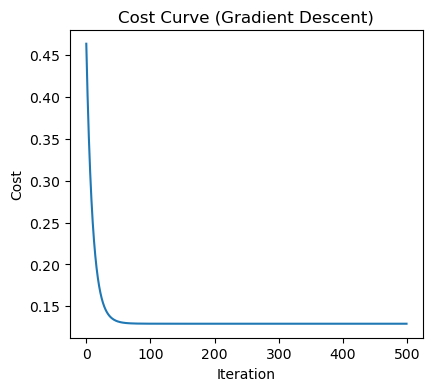

In [93]:
plt.figure(figsize=(10,4))


plt.subplot(1,2,1)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Curve (Gradient Descent)")

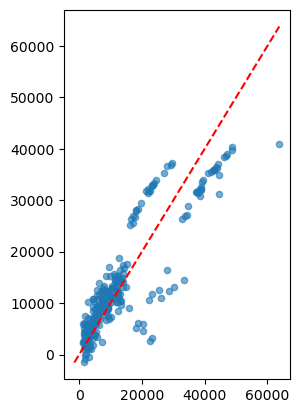

In [109]:
plt.subplot(1,2,2)
plt.scatter(y_test_raw, y_test_pred, s=20, alpha=0.6)
minv = min(y_test_raw.min(), y_test_pred.min())
maxv = max(y_test_raw.max(), y_test_pred.max())
plt.plot([minv,maxv], [minv,maxv], 'r--')

In [110]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [111]:
import numpy as np

sample = np.array([[40, 1, 28.5, 2, 0, 1, 0, 0]])
sample_norm = (sample - mu) / sigma
sample_with_bias = np.hstack([np.ones((1, 1)), sample_norm])
predicted_price = sample_with_bias.dot(theta_final)
print("\nPredicted insurance charge:", predicted_price[0][0])


Predicted insurance charge: 8469.001189793345
